In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
df = pd.read_csv("/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
df.shape

(270, 14)

In [7]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


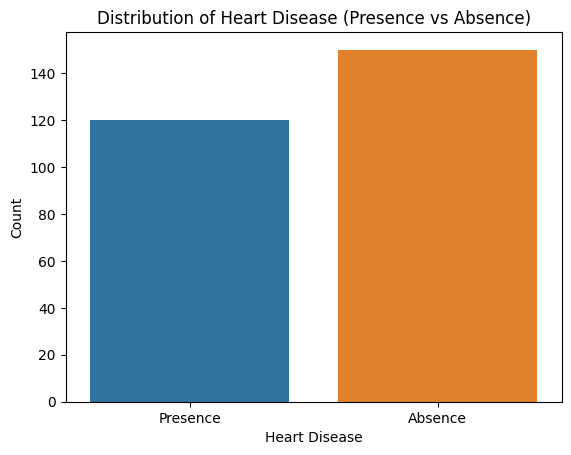

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df.columns = df.columns.str.strip() 


sns.countplot(data=df, x="Heart Disease")
plt.title("Distribution of Heart Disease (Presence vs Absence)")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()


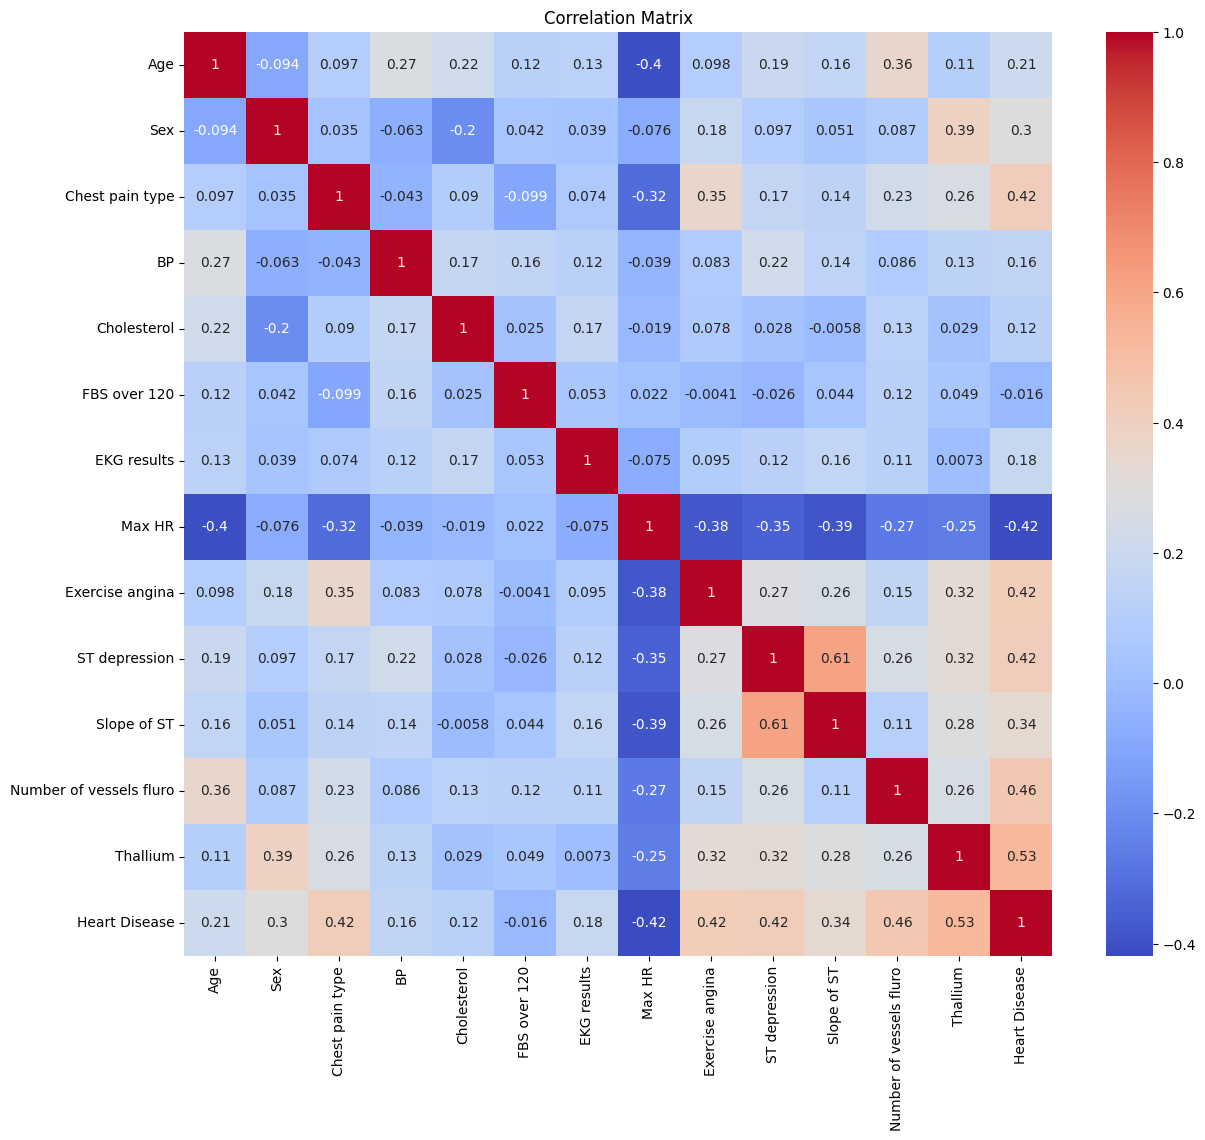

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})


plt.figure(figsize=(14, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [15]:
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import ExtraTreeClassifier
from sklearn.neural_network import BernoulliRBM

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Network": MLPClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Linear SVC": LinearSVC(),
    "Extra Trees Classifier": ExtraTreeClassifier()
    
}

for name, model in models.items():
    print(f"Training {name}...")
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy, 2)}")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...
Logistic Regression Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54

Training Decision Tree...
Decision Tree Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.82      0.70      0.75        33
           1       0.62      0.76      0.68        21

    accuracy                           0.72        54
   macro avg       0.72      0.73      0.72        54
weighted avg       0.74      0.72      0.73        54

Training Random Forest...
Random Forest Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    a

In [21]:
for name, model in models.items():
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {np.round(accuracy,2)}")

Logistic Regression accuracy: 0.91
Decision Tree accuracy: 0.7
Random Forest accuracy: 0.83
SVM accuracy: 0.89
KNN accuracy: 0.81
Gradient Boosting accuracy: 0.74
XGBoost accuracy: 0.81
AdaBoost accuracy: 0.89
Naive Bayes accuracy: 0.91
MLP Neural Network accuracy: 0.87
Ridge Classifier accuracy: 0.93
Bagging Classifier accuracy: 0.85
HistGradientBoosting accuracy: 0.81
Linear SVC accuracy: 0.91
Extra Trees Classifier accuracy: 0.8


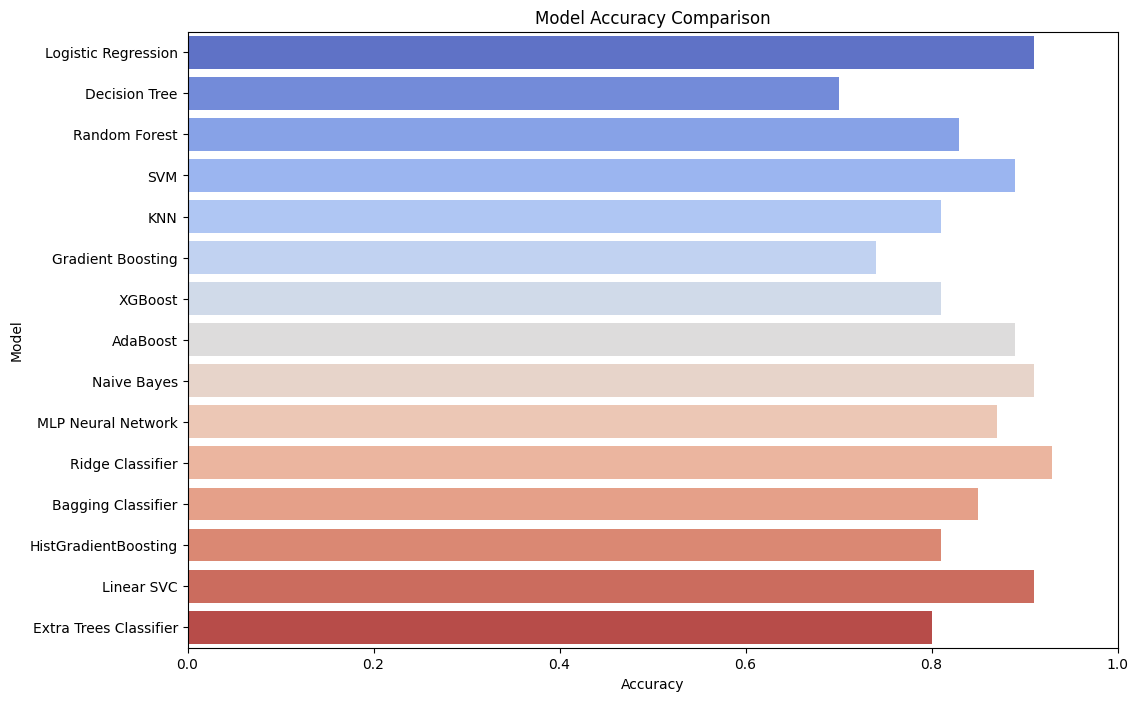

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


models = [
    "Logistic Regression", "Decision Tree", "Random Forest", "SVM", 
    "KNN", "Gradient Boosting", "XGBoost", "AdaBoost", "Naive Bayes", 
    "MLP Neural Network", "Ridge Classifier", "Bagging Classifier", 
    "HistGradientBoosting", "Linear SVC", "Extra Trees Classifier"
]
accuracies = [
    0.91, 0.7, 0.83, 0.89, 0.81, 0.74, 0.81, 0.89, 0.91, 
    0.87, 0.93, 0.85, 0.81, 0.91, 0.8
]


plt.figure(figsize=(12, 8))
sns.barplot(x=accuracies, y=models, palette="coolwarm")

plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1) 
plt.show()
